In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d0=pd.read_csv('./mnist_train.csv')

In [3]:
print(d0.head(5))

   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [4]:
l=d0['label']
d=d0.drop('label',axis=1)

In [5]:
print(d.shape)
print(l.shape)

(60000, 784)
(60000,)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


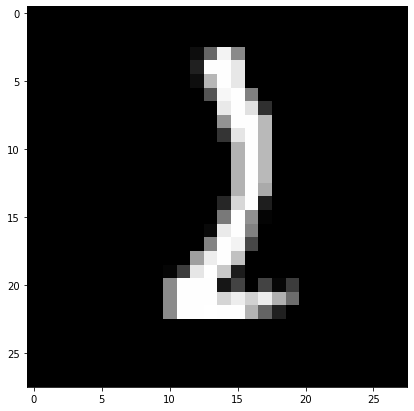

2


In [6]:
plt.figure(figsize=(7,7))
idx=180
grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data, interpolation ="none",cmap="gray")
plt.show()
print(l[idx])

### 2D Visualization

In [7]:
labels=l.head(42000)
data=d.head(42000)
print(data.shape)

(42000, 784)


In [8]:
#Data preprocessing
from sklearn.preprocessing import StandardScaler
s_data=StandardScaler().fit_transform(data)
print(s_data.shape)

(42000, 784)


In [9]:
sample=s_data
#matrix multiplication 
cov_matrix = np.matmul(sample.T,sample)
print(cov_matrix.shape)

(784, 784)


In [10]:
# Finding Eigen vectors and eigen values for projecting 2D space
from scipy.linalg import eigh
values,vectors = eigh(cov_matrix,eigvals=(782,783))
print(vectors.shape)
vectors=vectors.T
print(vectors.shape)

(784, 2)
(2, 784)


In [11]:
import pandas as pd

new=np.matmul(vectors,sample.T)
print(new.shape)
#adding new labels
new=np.vstack((new,labels)).T
#creating dataframe
dataframe=pd.DataFrame(data=new, columns=("1st","2nd","label"))
print(dataframe.head())

(2, 42000)
        1st       2nd  label
0 -4.869650 -0.954865    5.0
1 -7.872841  8.689135    0.0
2  9.182957  2.353300    4.0
3 -3.521128 -6.676095    1.0
4  2.753708 -5.034085    9.0


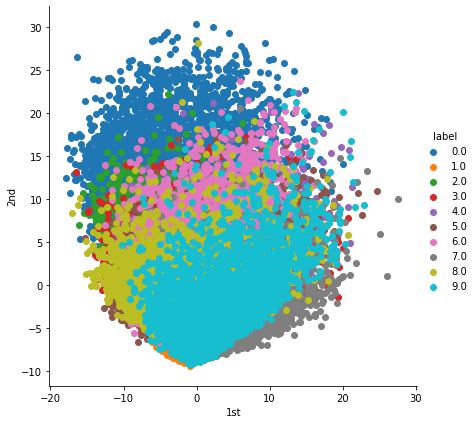

In [12]:
import seaborn as sns
sns.FacetGrid(dataframe,hue="label",height=6).map(plt.scatter,"1st","2nd").add_legend()
plt.show()

## PCA using scikit-learn

In [13]:
from sklearn import decomposition
pca=decomposition.PCA()

In [14]:
pca.n_components=2
pca_data=pca.fit_transform(sample)
print(pca_data.shape)

(42000, 2)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


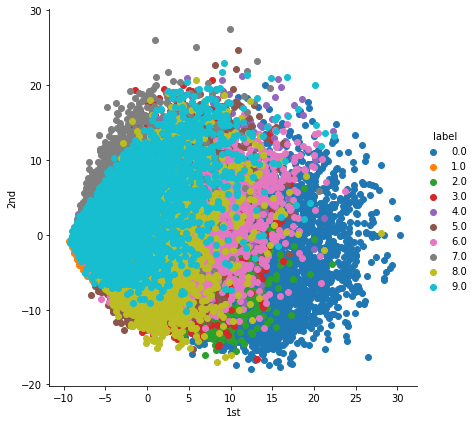

In [15]:
pca_data=np.vstack((pca_data.T,labels)).T
pca_df = pd.DataFrame(data=pca_data, columns=('1st', '2nd', 'label'))
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st', '2nd').add_legend()
plt.show()

## t-SNE using Scikit-Learn

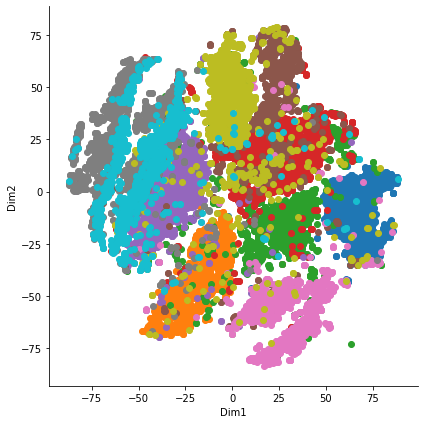

In [18]:
from sklearn.manifold import TSNE

data=s_data[0:15000,:]
labels=labels[0:15000]

model=TSNE(n_components=2, random_state=0)
tsne_data=model.fit_transform(data)
tsne_data=np.vstack((tsne_data.T,labels)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("Dim1","Dim2","label"))

sns.FacetGrid(tsne_df,hue="label",height=6).map(plt.scatter,'Dim1','Dim2')
plt.show()                                                

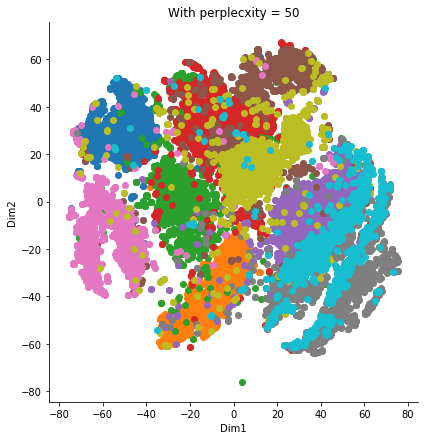

In [19]:
model=TSNE(n_components=2, random_state=0,perplexity=50)
tsne_data=model.fit_transform(data)
tsne_data=np.vstack((tsne_data.T,labels)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("Dim1","Dim2","label"))

sns.FacetGrid(tsne_df,hue="label",height=6).map(plt.scatter,'Dim1','Dim2')
plt.title('With perplecxity = 50')
plt.show()       

In [ ]:
model=TSNE(n_components=2, random_state=0,perplexity=50,n_iter=5000)
tsne_data=model.fit_transform(data)
tsne_data=np.vstack((tsne_data.T,labels)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("Dim1","Dim2","label"))

sns.FacetGrid(tsne_df,hue="label",height=6).map(plt.scatter,'Dim1','Dim2')
plt.title('With perplexity  = 50')
plt.show() 

In [ ]:
model=TSNE(n_components=2, random_state=0,perplexity=2,n_iter=5000)
tsne_data=model.fit_transform(data)
tsne_data=np.vstack((tsne_data.T,labels)).T
tsne_df=pd.DataFrame(data=tsne_data, columns=("Dim1","Dim2","label"))

sns.FacetGrid(tsne_df,hue="label",height=6).map(plt.scatter,'Dim1','Dim2')
plt.title('With perplexity  = 50')
plt.show() 